# Simple Web Scraping and EDA of Toronto Wealther Average

In [9]:
#import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Simple Web Scraping

In [10]:
url = 'https://www.worldweatheronline.com/toronto-weather-averages/ontario/ca.aspx'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [11]:
#print the HTML element of the url to see the structure
print(soup)


<!DOCTYPE html>

<html itemscope="" itemtype="https://schema.org/Organization" lang="en">
<head dir="auto" id="ctl00_Head1"><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/><title>
	Toronto Annual Weather Averages - Ontario, CA
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Find out annual weather averages in Toronto, Ontario, CA throughout the year. Best time to visit Toronto, Canada and what to wear in Toronto, Canada" id="ctl00_MetaDescTag" name="description"/><link href="https://cdn.worldweatheronline.com/" rel="preconnect"/><link href="https://cdn.worldweatheronline.com/" rel="dns-prefetch"/><link href="https://securepubads.g.doubleclick.net/" rel="dns-prefetch"/><link href="https://www.google-analytics.com/" rel="dns-prefetch"/><link href="https://www.googletagmanager.com" rel="dns-prefetch"/><link href="https://pubads.g.do

In [12]:
#select the first table element
table=soup.find_all('table')[0]

In [13]:
#extract the data through for loop and save the data in the list
data = []
for row in table.find_all('tr'):
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)

## Create DataFrame

In [14]:
df = pd.DataFrame(data[1:], columns=data[0])
df

,Month,Day,Night,Rain Days
0,January,-1°c,-7°c,9
1,February,-1°c,-7°c,9
2,March,4°c,-2°c,7
3,April,9°c,3°c,9
4,May,16°c,9°c,8
5,June,21°c,14°c,9
6,July,25°c,18°c,9
7,August,25°c,19°c,8
8,September,22°c,15°c,6
9,October,15°c,9°c,9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      12 non-null     object
 1   Day        12 non-null     object
 2   Night      12 non-null     object
 3   Rain Days  12 non-null     object
dtypes: object(4)
memory usage: 512.0+ bytes


## Data Cleaning

In [16]:
df.rename(columns={"Day":"Day(°c)", "Night":"Night(°c)"},inplace=True)
df['Day(°c)'] = df['Day(°c)'].str.replace('°c', '').astype(int)
df['Night(°c)'] = df['Night(°c)'].str.replace('°c', '').astype(int)
df['Rain Days'] = df['Rain Days'].astype(int)

In [17]:
df

,Month,Day(°c),Night(°c),Rain Days
0,January,-1,-7,9
1,February,-1,-7,9
2,March,4,-2,7
3,April,9,3,9
4,May,16,9,8
5,June,21,14,9
6,July,25,18,9
7,August,25,19,8
8,September,22,15,6
9,October,15,9,9


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      12 non-null     object
 1   Day(°c)    12 non-null     int32 
 2   Night(°c)  12 non-null     int32 
 3   Rain Days  12 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 368.0+ bytes


## Exploratory Data Analysis

In [19]:
df.describe()

,Day(°c),Night(°c),Rain Days
count,12.000000,12.000000,12.000000
mean,12.083333,6.000000,8.166667
std,9.866917,9.341987,1.193416
min,-1.000000,-7.000000,6.000000
25%,3.500000,-2.000000,7.750000
50%,12.000000,6.000000,9.000000
75%,21.250000,14.250000,9.000000
max,25.000000,19.000000,9.000000


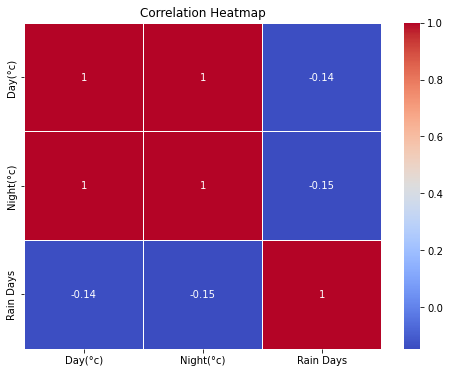

In [20]:
#Heatmap to visualize correlations between temperature and rainy days
correlation_matrix = df[['Day(°c)', 'Night(°c)', 'Rain Days']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix indicates that there is a strong positive correlation between daytime and nighttime temperatures (Day(°c) and Night(°c)) in Toronto, while the number of rainy days (Rain Days) is negatively correlated with both temperature variables, suggesting that as temperatures increase, the number of rainy days tends to decrease.

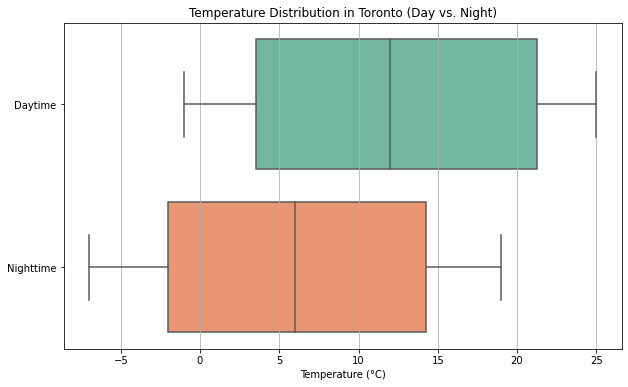

In [22]:
#Boxplot to show temperature distribution (Day vs. Night)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Day(°c)', 'Night(°c)']], orient='h', palette='Set2')
plt.title('Temperature Distribution in Toronto (Day vs. Night)')
plt.xlabel('Temperature (°C)')
plt.yticks([0, 1], ['Daytime', 'Nighttime'])
plt.grid(axis='x')
plt.show()

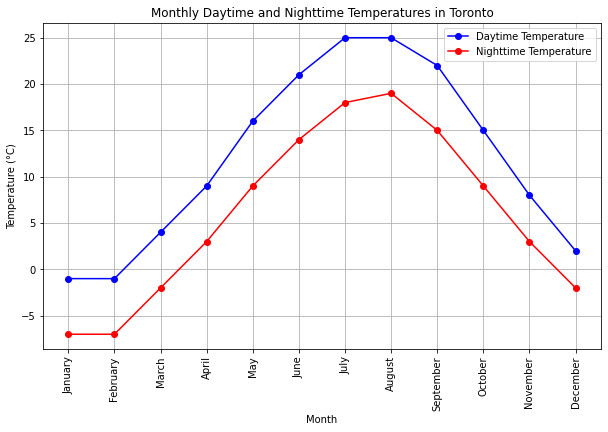

In [23]:
#Line chart to display yearly temperature patterns
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Day(°c)'], label='Daytime Temperature', marker='o', linestyle='-', color='b')
plt.plot(df['Month'], df['Night(°c)'], label='Nighttime Temperature', marker='o', linestyle='-', color='r')

plt.title('Monthly Daytime and Nighttime Temperatures in Toronto')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

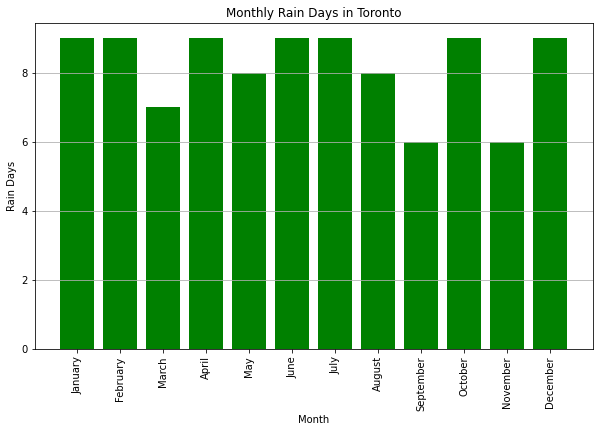

In [24]:
#Bar chart to show annual rainy days
plt.figure(figsize=(10, 6))
plt.bar(df['Month'], df['Rain Days'], color='g')

plt.title('Monthly Rain Days in Toronto')
plt.xlabel('Month')
plt.ylabel('Rain Days')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.show()

## Data Export

In [171]:
df.to_csv('toronto_weather_averages.csv', index=False)

## Conclusion

This analysis explores the historical weather data for Toronto, including average daytime and nighttime temperatures, as well as the number of rainy days for each month. The analysis includes data scraping, data cleaning, data visualization, and statistical summaries. Key findings and visualizations are presented to help understand Toronto's weather patterns throughout the year.